In [1]:
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py

## Dataset Loading, Visualize & Proprocessing

In [2]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('data/test_catvnoncat.h5', "r")

train_X_orig = tf.convert_to_tensor( train_dataset['train_set_x'][:].reshape(209,-1), dtype=tf.float32)  # (m, d)=(209, 12288);  from (209,64,64,3)
train_Y = tf.convert_to_tensor( train_dataset['train_set_y'][:].reshape(209,-1), dtype=tf.float32)       # (m, 1)=(209, 1)

test_X_orig = tf.convert_to_tensor( test_dataset['test_set_x'][:].reshape(50,-1), dtype=tf.float32)  # (50, 12288)
test_Y = tf.convert_to_tensor( test_dataset['test_set_y'][:].reshape(50,-1), dtype=tf.float32)       # (50, 1)

train_X = train_X_orig/255.0
test_X = test_X_orig/255.0

In [3]:
print (f"Number of training examples: m_train = {train_X_orig.shape[0]}")
print (f"Number of testing examples: m_test = {test_X_orig.shape[0]}")
print ("Each image is of size: (64, 64, 3) \n")
print (f"train_X shape: {train_X.shape}")
print (f"train_Y shape: {train_Y.shape}")
print (f"test_X shape: {test_X.shape}")
print (f"test_Y shape: {test_Y.shape}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Each image is of size: (64, 64, 3) 

train_X shape: (209, 12288)
train_Y shape: (209, 1)
test_X shape: (50, 12288)
test_Y shape: (50, 1)


y = 1, it's a 'cat' picture.


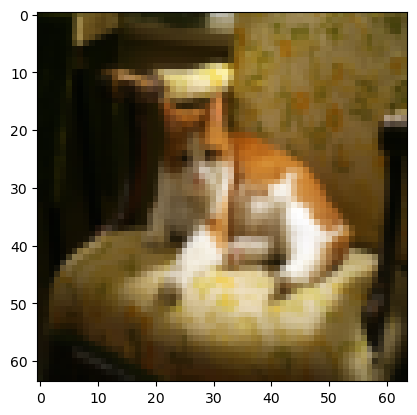

In [4]:
classes = test_dataset["list_classes"][:] # the list of classes
# Visualize sample picture
index = 7
plt.imshow(train_X_orig[index].numpy().astype(np.uint8).reshape(64,64,3))
print (f"y = {int(train_Y[index])}, it's a '{classes[int(train_Y[index])].decode('utf-8')}' picture.")

# Theory Hidden Layer Neural Network

## Now
$ \boldsymbol{X} = \begin{bmatrix} \quad \boldsymbol x^1 \quad 
\\ \quad \boldsymbol{x}^2 \quad \\ \quad \vdots \quad \\ \quad \boldsymbol x^m \quad \end{bmatrix} $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 & f_2 & f_3 & \dots \quad f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,d)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,d)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,1)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} & \bold {w_2}  & \dots & \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} \vdots \\ \boldsymbol{\omega_1} & \boldsymbol{\omega_2} & \dots & \boldsymbol{\omega_{n_l}} \\ \vdots \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1},1)}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1},n_l)}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

build-in dense($A^{[l-1]}$)
<br>
$ \boldsymbol{Z^{[l]}/dense} = \boldsymbol{A^{[l-1]} W^{[l]}+b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(m,n_l)=(m,n_{l-1})\times(n_{l-1},n_l)} $
<br>
$ \boldsymbol Z^{[l]} = \begin{bmatrix} z^1 \\ z^2 & \boldsymbol{z^{[l]}_{2}} & \boldsymbol{z^{[l]}_{3}} & \dots & \boldsymbol{z^{[l]}_{n_l}} \\ \vdots \\ z^m \end{bmatrix} $

**Data**
<br>
$
\boldsymbol {X} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(m,n_0)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[L]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(m,n_L)} \color{default}
\\
\boldsymbol {W^{[l]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_{l-1},n_{l})} \color{default}
\\
\boldsymbol {b^{[l]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_{l},)} \color{default}
$

$ \boldsymbol {Z^{[l]}} = \boldsymbol{A^{[l-1]}W^{[l]}} + \boldsymbol{b^{[l]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(m,n_l)=(m,n_{l-1})\times(n_{l-1},n_l)} \\$

# Model using sequential, optimizer API

In [5]:
def nn_layers_model(train_X, train_Y, layers_dims, num_epochs=2000, learning_rate=0.0075, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    """
    L layer neural network with different activation function on output layer option.
    
    Parameters
    ----------
    train_X : Tensor [shape: (#samples, #features)]; dtype=tf.float32
    train_Y : Tensor [shape: (#samples, 1)]; dtype=tf.float32
    layers_dims : list of int; list of number of nodes in each layer

    Returns
    -------
    forward: trained model
    costs: list of cost every 100 iteration
    """
    costs = []                                        # To keep track of the cost
    L = len(layers_dims)  # number of layers in the network

    ## Initialize model
    forward = k.models.Sequential()
    np.random.seed(3)
    # layers initialized; [1:L-1] X activation_L_1 + [L] X activation_L
    for l in range(1, L-1):
        init_W = (np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1])).T.astype(np.float32)
        forward.add( k.layers.Dense(units=layers_dims[l], activation=activation_L_1, input_shape=(layers_dims[l-1],),
                                    kernel_initializer=tf.constant_initializer(init_W),
                                    bias_initializer="zeros") )
        #  kernel_initializer=k.initializers.RandomNormal(mean=0.0, stddev=1.0,seed=3)
    init_W = (np.random.randn(layers_dims[-1], layers_dims[-2]) / np.sqrt(layers_dims[-2])).T.astype(np.float32)
    forward.add( k.layers.Dense(units=layers_dims[-1], activation=activation_L, input_shape=(layers_dims[-2],),
                                kernel_initializer=tf.constant_initializer(init_W),
                                bias_initializer="zeros") )
    # forward.summary()

    ## Initialize build-in classes
    bce = tf.keras.losses.BinaryCrossentropy( from_logits=False, reduction='sum')
    optimizer = tf.keras.optimizers.SGD(learning_rate)

    ## epochs loop
    for i in range(num_epochs): 
        ## forward pass
        with tf.GradientTape() as tape:
            train_Y_pred = forward(train_X)       # (209,1)=(m,n_y)
            cost = bce(tf.transpose(train_Y), tf.transpose(train_Y_pred))
        
        ## backward pass
        grads = tape.gradient(cost, forward.trainable_weights)
        optimizer.apply_gradients(zip(grads, forward.trainable_weights))

        ## Record the cost every 100 iterations
        if i % 100 == 0 or i == num_epochs-1:
            costs.append(cost.numpy().item())
            ## Print the cost every 100 training epochs
            if print_cost:
                print(f"Cost in epochs {i+1}, {cost.numpy().item()}")

    return forward, costs

## Run Model

Cost in epochs 1, 0.7611593008041382
Cost in epochs 101, 0.6155427694320679
Cost in epochs 201, 0.5134584903717041
Cost in epochs 301, 0.4166596233844757
Cost in epochs 401, 0.37122470140457153
Cost in epochs 501, 0.29111674427986145
Cost in epochs 601, 0.1866871565580368
Cost in epochs 701, 0.10821317881345749
Cost in epochs 801, 0.06349758058786392
Cost in epochs 901, 0.03896908089518547
Cost in epochs 1001, 0.026119289919734
Cost in epochs 1101, 0.018831739202141762
Cost in epochs 1201, 0.014421026222407818
Cost in epochs 1301, 0.011443388648331165
Cost in epochs 1401, 0.009383631870150566
Cost in epochs 1501, 0.00787029042840004
Cost in epochs 1601, 0.006721509154886007
Cost in epochs 1701, 0.0058394791558384895
Cost in epochs 1801, 0.005134083330631256
Cost in epochs 1901, 0.0045681907795369625
Cost in epochs 2000, 0.0041007669642567635
train accuracy: 100.0 %
test accuracy: 77.99999713897705 %


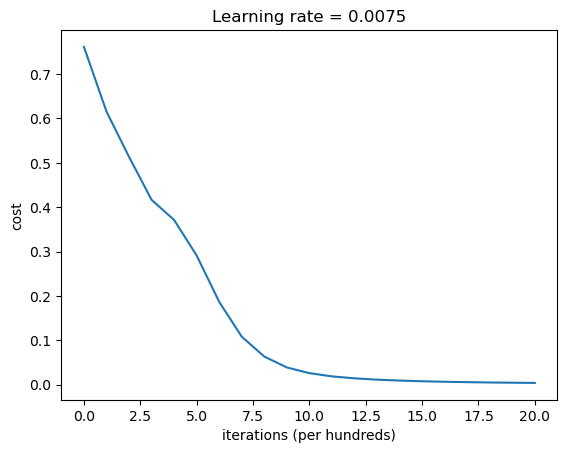

In [6]:
activation_L_1="relu"; activation_L="sigmoid"; learning_rate = 0.0075; layers_dims=[12288, 20, 15, 15, 1]

forward, costs = nn_layers_model(train_X, train_Y, layers_dims=layers_dims, num_epochs=2000, learning_rate=learning_rate, activation_L_1=activation_L_1, activation_L=activation_L, print_cost=True)

## Predict train/test set examples
train_Y_pred = forward(train_X)                          # shape(m,1); EagerTensor float32
train_Y_pred_out = tf.cast(train_Y_pred > 0.5, "float32")   # shape(m,1); EagerTensor float32
test_Y_pred = forward(test_X)               
test_Y_pred_out = tf.cast(test_Y_pred > 0.5, "float32")

## Print train/test Errors
acc = k.metrics.binary_accuracy(tf.transpose(train_Y), tf.transpose(train_Y_pred), threshold=0.5)
print(f"train accuracy: { acc.numpy().item() *100 } %")
acc = k.metrics.binary_accuracy(tf.transpose(test_Y), tf.transpose(test_Y_pred), threshold=0.5)
print(f"test accuracy: { acc.numpy().item() *100 } %")

# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate = {learning_rate}")
plt.show()

**Comment**: Training accuracy is close to 100%. This is a good sanity check: Test accuracy is 78%. The model is clearly overfitting the training data. It can be reduced by regularization technique and using more layers neural network to capture nonlinear complexity better.

**Interpretation**:
The cost decreasing shows that the parameters are being learned. However, could train the model even more on the training set. Increasing the number of iterations/epochs result in the training accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## Plot results

y = 1,  but y_pred = 1 so predicted that it is a 'cat' picture.


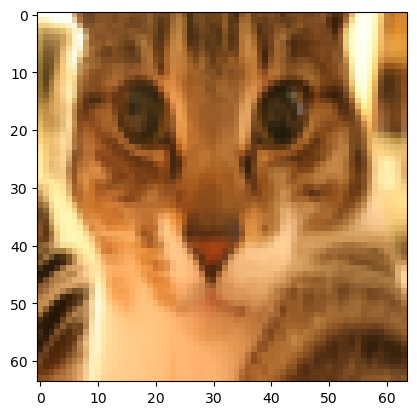

In [7]:
# Example of a picture that is rightly classified.
index = 3
plt.imshow(test_X_orig[index].numpy().astype(np.uint8).reshape(64,64,3))
print(f"y = {int(test_Y[index])},  but y_pred = {int(test_Y_pred_out[index])} so predicted that it is a '{classes[int(test_Y_pred_out[index])].decode('utf-8')}' picture.")

y = 0, but y_pred = 1 so predicted that it is a 'cat' picture.


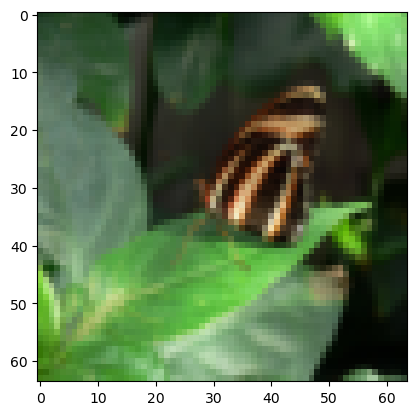

In [8]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_X_orig[index].numpy().astype(np.uint8).reshape(64,64,3))
print(f"y = {int(test_Y[index])}, but y_pred = {int(test_Y_pred_out[index])} so predicted that it is a '{classes[int(test_Y_pred_out[index])].decode('utf-8')}' picture.")

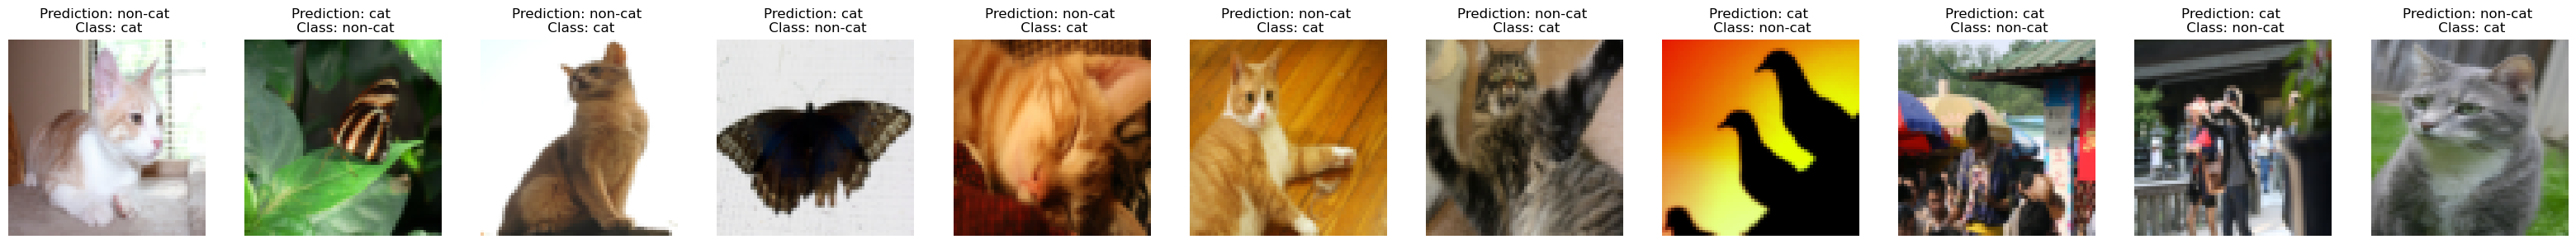

In [9]:
# Plots false predicted images
a = test_Y_pred_out + test_Y
mislabeled_indices = np.asarray(np.where(a == 1))
plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
num_images = len(mislabeled_indices[0])
for i in range(num_images):
    index = mislabeled_indices[0][i]
    
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_X[index].numpy().reshape(64,64,3), interpolation='nearest')
    plt.axis('off')
    plt.title("Prediction: " + classes[int(test_Y_pred_out[index])].decode("utf-8") + " \n Class: " + classes[int(test_Y[index])].decode("utf-8"))
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work, must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly change the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of `learning rates`. Run the cell below. 

Training a model with learning rate: 0.005

-------------------------------------------------------

Training a model with learning rate: 0.006

-------------------------------------------------------

Training a model with learning rate: 0.007

-------------------------------------------------------

Training a model with learning rate: 0.008

-------------------------------------------------------

Training a model with learning rate: 0.009

-------------------------------------------------------



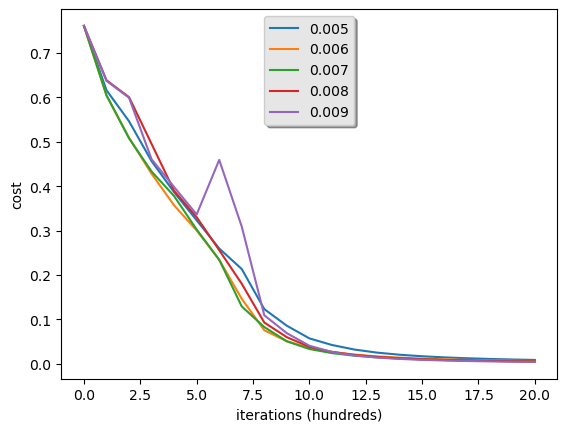

In [10]:
learning_rates = [0.005, 0.006, 0.007, 0.008, 0.009]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = nn_layers_model(train_X, train_Y, layers_dims, num_epochs=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)][1]), label=str(lr))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.0075 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If model overfits, use other techniques to reduce overfitting.


# Test with your own image ##

Use your own image and see the output of your model. To do that:<br>
1. Add image to this Jupyter Notebook's directory, in the "img" folder.<br>
2. Change your image's name in the following code<br>
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!<br>

y_pred = 0, neuron algorithm predicts a 'non-cat' picture.


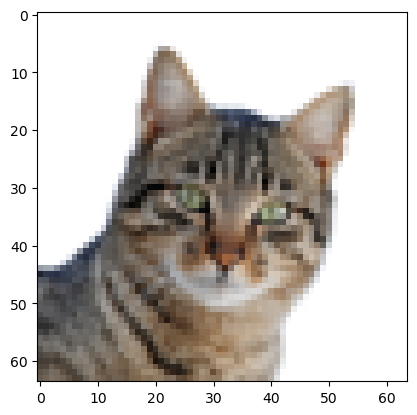

In [11]:
# change this to the name of your image file
my_image = "img/my_image_1.jpg"   

num_px = 64
# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3))   
image = tf.convert_to_tensor(image, dtype=tf.float32)

Y_pred = forward(image)     # shape(m,n_y)  
my_image_pred = tf.cast(Y_pred > 0.5, "float32")

print(f"y_pred = {int(my_image_pred)}, neuron algorithm predicts a '{classes[int(my_image_pred)].decode('utf-8')}' picture.")

y_pred = 1, neuron algorithm predicts a 'cat' picture.


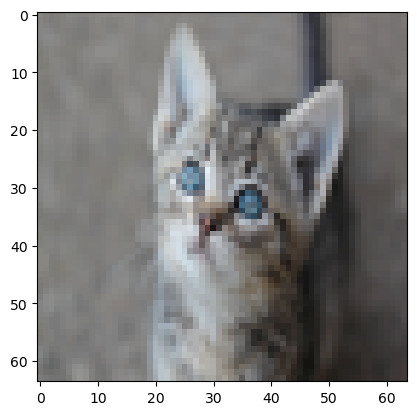

In [12]:
# change this to the name of your image file
my_image = "img/my_image_2.jpg"   

# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3))    # np.ndarray shape(1, 12288)
image = tf.convert_to_tensor(image, dtype=tf.float32)

Y_pred = forward(image)    # shape(m,n_y)  
my_image_pred = tf.cast(Y_pred > 0.5, "float32")

print(f"y_pred = {int(my_image_pred)}, neuron algorithm predicts a '{classes[int(my_image_pred)].decode('utf-8')}' picture.")